# Instruções
- Imagine que você é Cientista de Dados e está responsável por um projeto no qual a Federação das Indústrias está prestando consultoria para um e-commerce. O Cliente está querendo aumentar o seu faturamento e devido a questões de negócios como problemas com fornecedores, promoções mal planejadas, incidência de impostos e afins, algumas vendas podem resultar em prejuízo Atualmente, essas informações não estão disponíveis previamente. Dessa forma, faça um modelo que preveja o Lucro (Profit) ou prejuízo de vendas feitos no e-commerce. Caso o algoritmo identifique que haverá prejuízo, o site irá indeferir a compra, enviando-a para que um analista possa verificar o que está ocorrendo.

## Questão A: Faça um Jupyter notebook, com a análise, exploração, visualização dos dados e elaboração de um modelo que preveja a coluna Profit do Dataset disponibilizado.

In [42]:
import pandas as pd # carregar dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import warnings

# Ignorar avisos de usuário
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.svm import SVC
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, precision_recall_fscore_support, roc_auc_score

In [2]:
data = pd.read_csv('dados.csv')
data.head(5)

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
0,643,High,21,2781.82,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
1,8995,High,35,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
2,9127,Not Specified,7,2039.56,Express Air,-329.49,Bryan Davis,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box
3,26272,Low,6,905.94,Express Air,-4.19,Carlos Daly,Northwest Territories,Home Office,Furniture,Chairs & Chairmats,Hon Olson Stacker Stools,Large Box
4,36646,Medium,24,1168.15,Express Air,-743.96,Muhammed MacIntyre,Northwest Territories,Small Business,Office Supplies,Storage & Organization,Tennsco Industrial Shelving,Large Box


- Análise e Exploração dos Dados

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order_ID              730 non-null    int64  
 1   Order_Priority        730 non-null    object 
 2   Order_Quantity        730 non-null    int64  
 3   Sales                 730 non-null    float64
 4   Ship_Mode             730 non-null    object 
 5   Profit                730 non-null    float64
 6   Customer_Name         730 non-null    object 
 7   Region                730 non-null    object 
 8   Customer_Segment      730 non-null    object 
 9   Product_Category      730 non-null    object 
 10  Product_Sub-Category  730 non-null    object 
 11  Product_Name          730 non-null    object 
 12  Product_Container     730 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 74.3+ KB


In [4]:
data.describe()

,Order_ID,Order_Quantity,Sales,Profit
count,730.000000,730.000000,730.000000,730.000000
mean,29721.597260,24.857534,1502.777653,207.479233
std,17350.560439,14.182970,2893.936648,878.631028
min,35.000000,1.000000,8.600000,-4437.910000
25%,14479.000000,13.000000,171.098375,-77.132500
50%,29350.500000,25.000000,438.700000,0.035000
75%,44978.500000,37.000000,1480.855000,180.000000
max,59909.000000,50.000000,27663.920000,8417.570000


- Visualização dos Dados (Histograma)

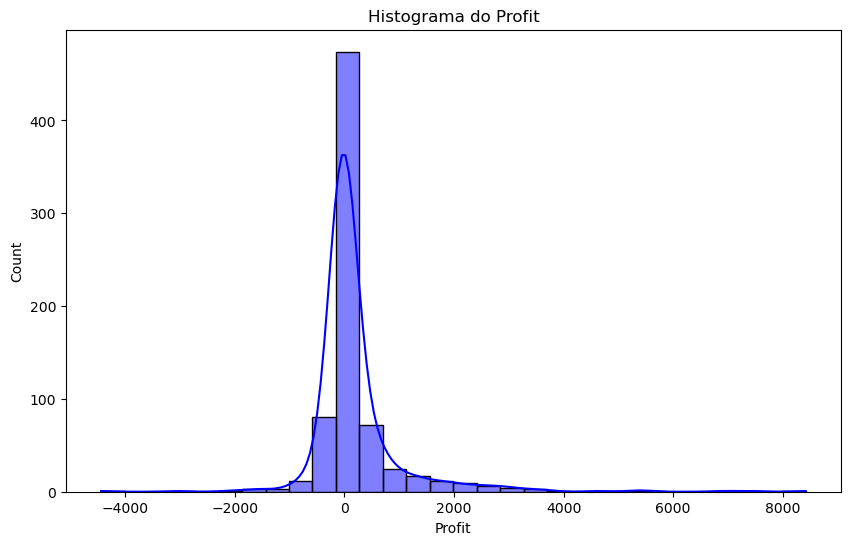

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Profit'], bins=30, kde=True, color='blue')
plt.xlabel('Profit')
plt.ylabel('Count')
plt.title('Histograma do Profit')
plt.show()

In [6]:
# 1. Análise e Exploração dos Dados
# Calculando a taxa de lucro médio
data['Taxa_Lucro'] = data['Profit'] / data['Sales']

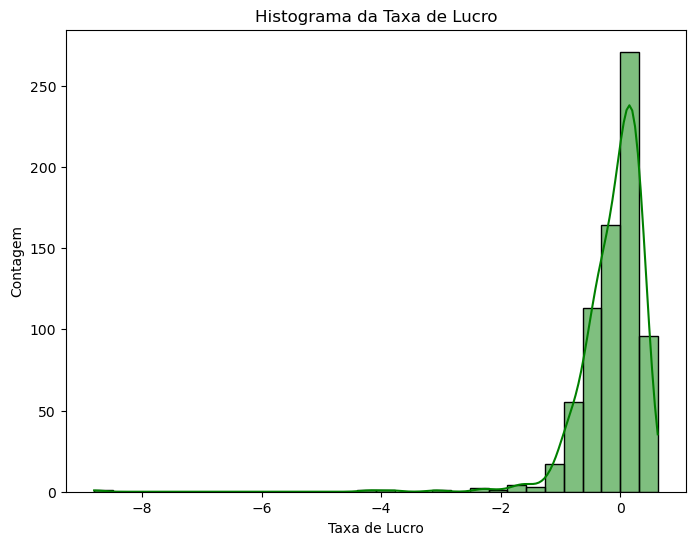

In [7]:
# Analisando a distribuição da taxa de lucro
plt.figure(figsize=(8, 6))
sns.histplot(data['Taxa_Lucro'], bins=30, kde=True, color='green')
plt.xlabel('Taxa de Lucro')
plt.ylabel('Contagem')
plt.title('Histograma da Taxa de Lucro')
plt.show()

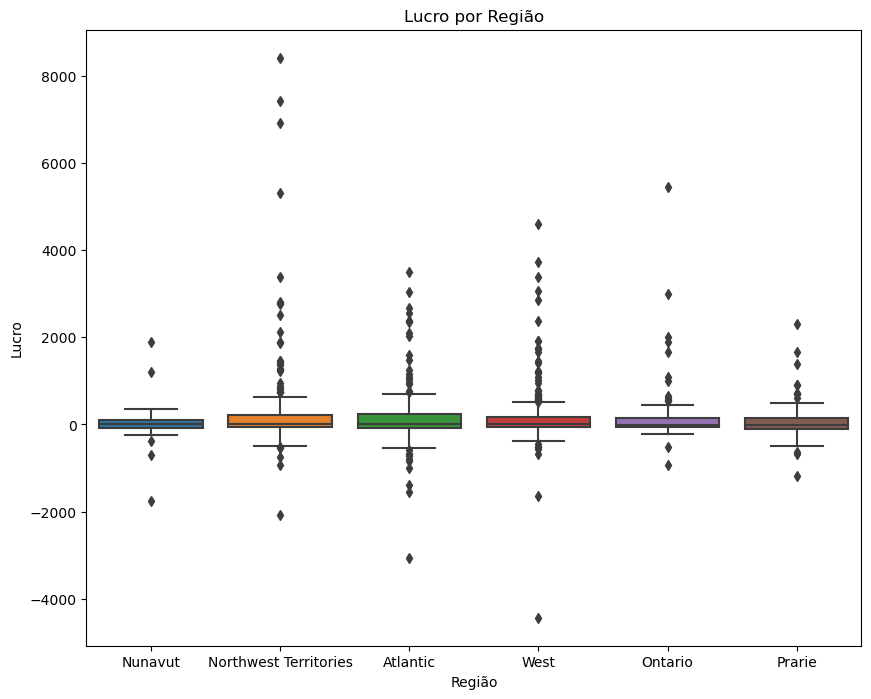

In [8]:
# Visualização dos Dados
# Visualizando a relação entre lucro e região
plt.figure(figsize=(10, 8))
sns.boxplot(x='Region', y='Profit', data=data)
plt.xlabel('Região')
plt.ylabel('Lucro')
plt.title('Lucro por Região')
plt.show()

- Pré-processamento dos dados 

In [9]:
# Criar a coluna de classes 'y' com base na condição de lucro
X = data.drop(['Profit', 'Taxa_Lucro'], axis=1)
y = (data['Profit'] < 0).astype(int) # 1 se houver prejuízo, 0 se não

<Axes: xlabel='Profit', ylabel='count'>

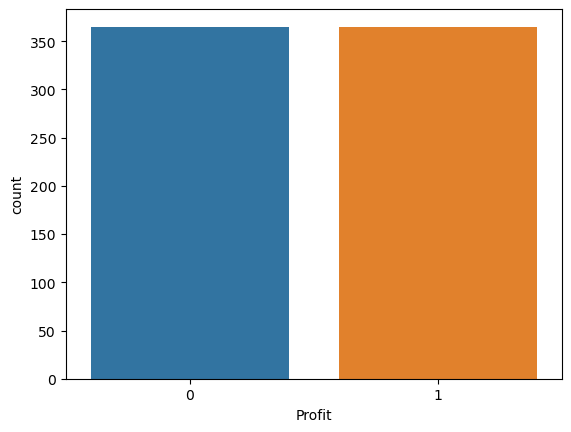

In [10]:
# Criar um gráfico de contagem das classes
sns.countplot(x=y)

In [11]:
# Contagem de grupos
counts = y.value_counts()

# Mostrar contagem
print(counts)

Profit
1    365
0    365
Name: count, dtype: int64


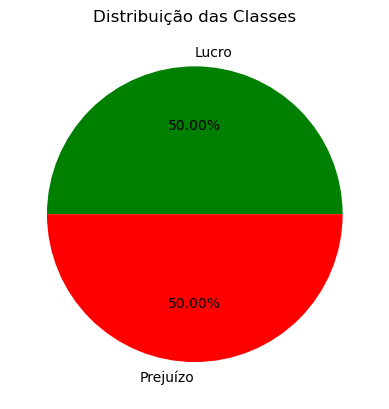

In [12]:
colors = ['green', 'red']

# Gráfico de pizza
plt.pie(counts, labels=['Lucro', 'Prejuízo'], autopct='%.2f%%', colors=colors)

# Adicionar título ao gráfico
plt.title('Distribuição das Classes')

# Mostrar o gráfico
plt.show()

In [13]:
X

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
0,643,High,21,2781.82,Express Air,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
1,8995,High,35,3389.93,Express Air,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
2,9127,Not Specified,7,2039.56,Express Air,Bryan Davis,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box
3,26272,Low,6,905.94,Express Air,Carlos Daly,Northwest Territories,Home Office,Furniture,Chairs & Chairmats,Hon Olson Stacker Stools,Large Box
4,36646,Medium,24,1168.15,Express Air,Muhammed MacIntyre,Northwest Territories,Small Business,Office Supplies,Storage & Organization,Tennsco Industrial Shelving,Large Box
...,...,...,...,...,...,...,...,...,...,...,...,...
725,56101,Not Specified,44,5347.13,Regular Air,Bill Donatelli,Ontario,Corporate,Office Supplies,Binders and Binder Accessories,GBC Therma-A-Bind 250T Electric Binding System,Small Box
726,1059,Critical,22,127.33,Regular Air,Sean O'Donnell,Ontario,Corporate,Office Supplies,Binders and Binder Accessories,Wilson Jones 14 Line Acrylic Coated Pressboard...,Small Box
727,1059,Critical,24,990.10,Regular Air,Sean O'Donnell,Ontario,Corporate,Office Supplies,Binders and Binder Accessories,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",Small Box
728,1826,Not Specified,5,28.32,Regular Air,Susan Vittorini,Ontario,Corporate,Office Supplies,Paper,Hammermill CopyPlus Copy Paper (20Lb. and 84 B...,Small Box


In [14]:
# Codificação One-Hot
X_encoded = pd.get_dummies(X)

In [15]:
X_encoded

,Order_ID,Order_Quantity,Sales,Order_Priority_Critical,Order_Priority_High,Order_Priority_Low,Order_Priority_Medium,Order_Priority_Not Specified,Ship_Mode_Express Air,Ship_Mode_Regular Air,...,Product_Name_XtraLife® ClearVue™ Slant-D® Ring Binders by Cardinal,Product_Name_Zoom V.92 USB External Faxmodem,Product_Name_Zoom V.92 V.44 PCI Internal Controllerless FaxModem,Product_Name_g520,Product_Name_i1000,Product_Name_i470,Product_Name_i500plus,Product_Container_Large Box,Product_Container_Medium Box,Product_Container_Small Box
0,643,21,2781.82,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,8995,35,3389.93,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,9127,7,2039.56,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,True,False,False
3,26272,6,905.94,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,36646,24,1168.15,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,56101,44,5347.13,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
726,1059,22,127.33,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
727,1059,24,990.10,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
728,1826,5,28.32,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True


- Dividindo os dados em conjuntos de treinamento e teste

In [25]:
# Dividir os dados em treinamento e teste usando o StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=0)
for train_index, test_index in sss.split(X_encoded, y):
    X_train, X_test = X_encoded.values[train_index], X_encoded.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

In [26]:
X.shape

(730, 12)

In [27]:
y.shape

(730,)

In [28]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(547, 659) (183, 659) (547,) (183,)


## Aplicação dos modelos de ML:
#### Seleção de modelos:
* Regressão Logística
* Árvore de Decisão
* KNeighborsClassifier
* Random Forest.
* XG Boost


## PIPELINE REGRESSÃO LOGÍSTICA

Existem alguns parâmetros que você pode ajustar para uma regressão logística no scikit-learn. Aqui estão alguns exemplos:

* `penalty`: Especifica a norma a ser usada na regularização. Pode ser 'L1', 'L2', 'elasticnet' ou 'none'.


* `C`: Parâmetro de inversão de regularização. Valores menores especificam uma regularização mais forte.


* `solver`: Algoritmo a ser usado no problema de otimização. Pode ser 'newton-cg', 'lbfgs', 'liblinear', 'sag' ou 'saga'.


* `max_iter`: Número máximo de iterações para o solucionador convergir.

## PIPELINE REGRESSÃO LOGÍSTICA

In [33]:
import time

start_time = time.time()


pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('Logistic_Regression', LogisticRegression(max_iter=10000))
])

param_grid = [
    {'Logistic_Regression__solver': ['newton-cg', 'sag'],
     'Logistic_Regression__C': [0.1, 1.0, 10.0, 100.0],
     'Logistic_Regression__penalty': ['l2']},
    {'Logistic_Regression__solver': ['lbfgs'],
     'Logistic_Regression__C': [0.1, 1.0, 10.0, 100.0],
     'Logistic_Regression__penalty': ['l2']}
]

### O mean_test_score é a média das pontuações de teste obtidas pelo modelo para cada combinação de hiperparâmetros avaliada. Ele é calculado como a média das pontuações de teste em todas as divisões de validação cruzada ou, se o treino é realizado com conjunto de validação único, com o conjunto de validação separado. Esse valor representa uma métrica de desempenho geral do modelo para aquele conjunto de hiperparâmetros.

### Verificarndo os resultados. Você pode acessar os melhores hyperparâmetros e a melhor pontuação usando os atributos `best_params_` , `best_score` (se for a métrica acurracy) e o `best_estimator`

In [34]:
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

#y_pred = grid.predict(X_train)

print("Melhores parâmetros: ", grid.best_params_)
print("Melhores hiper-parâmetros: ", grid.best_estimator_)
lr_mean_score = grid.best_score_
print("Melhor pontuação de validação cruzada: ", lr_mean_score)

execution_time = time.time() - start_time
minutes, seconds = divmod(execution_time, 60)

print("--- %d minutes %d seconds ---" % (minutes, seconds))

results = []
results.append(("Melhores parâmetros: ", grid.best_params_))
results.append(("Melhores hiper-parâmetros: ", grid.best_estimator_))
results.append(("Melhor pontuação de validação cruzada: ", lr_mean_score))

df = pd.DataFrame(results)

#df.to_csv("S_features_grid_search_RL.csv", index=False)

#df.to_html("S_features_grid_search_RL.html")

Melhores parâmetros:  {'Logistic_Regression__C': 0.1, 'Logistic_Regression__penalty': 'l2', 'Logistic_Regression__solver': 'newton-cg'}
Melhores hiper-parâmetros:  Pipeline(steps=[('std_scaler', StandardScaler()),
                ('Logistic_Regression',
                 LogisticRegression(C=0.1, max_iter=10000,
                                    solver='newton-cg'))])
Melhor pontuação de validação cruzada:  0.6910925771476231
--- 0 minutes 19 seconds ---


In [35]:
y_pred_lr = grid.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70        92
           1       0.70      0.65      0.67        91

    accuracy                           0.69       183
   macro avg       0.69      0.69      0.69       183
weighted avg       0.69      0.69      0.69       183



## PIPELINE ÁRVORE DE DECISÃO

In [36]:
start_time = time.time()

pipe_TREE = Pipeline([
    ('std_scaler', StandardScaler()),
    ('Decision_Tree', DecisionTreeClassifier())
])

param_grid_TREE = [
    {'Decision_Tree__criterion': ['gini', 'entropy'],
     'Decision_Tree__max_depth': [1, 2, 4, 8, 16, 32, None]}
]

In [37]:
grid1 = GridSearchCV(pipe_TREE, param_grid_TREE, cv=5)
grid1.fit(X_train, y_train)

#y_pred = grid1.predict(X_train)

print("Melhores parâmetros: ", grid1.best_params_)
print("Melhores hiper-parâmetros: ", grid1.best_estimator_)
dtc_mean_score = grid.best_score_
print("Melhor pontuação de validação cruzada: ", dtc_mean_score)

execution_time = time.time() - start_time
minutes, seconds = divmod(execution_time, 60)

print("--- %d minutes %d seconds ---" % (minutes, seconds))

results1 = []
results1.append(("Melhores parâmetros: ", grid1.best_params_))
results1.append(("Melhores hiper-parâmetros: ", grid1.best_estimator_))
results1.append(("Melhor pontuação de validação cruzada: ", dtc_mean_score))

df1 = pd.DataFrame(results1)

df1.to_csv("S_features_grid_search_TREE.csv", index=False)

df1.to_html("S_features_grid_search_TREE.html")

Melhores parâmetros:  {'Decision_Tree__criterion': 'gini', 'Decision_Tree__max_depth': 4}
Melhores hiper-parâmetros:  Pipeline(steps=[('std_scaler', StandardScaler()),
                ('Decision_Tree', DecisionTreeClassifier(max_depth=4))])
Melhor pontuação de validação cruzada:  0.6910925771476231
--- 0 minutes 3 seconds ---


In [38]:
# Predict the test set
y_pred_dtc = grid1.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76        92
           1       0.76      0.78      0.77        91

    accuracy                           0.77       183
   macro avg       0.77      0.77      0.76       183
weighted avg       0.77      0.77      0.76       183



## PIPELINE KNN

In [39]:
start_time = time.time()

pipe_KNN = Pipeline([
    ('std_scaler', StandardScaler()),
    ('KNN', KNeighborsClassifier())
])

param_grid_KNN = [
    {'KNN__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
     'KNN__weights': ['uniform', 'distance']}
]

In [43]:
grid2 = GridSearchCV(pipe_KNN, param_grid_KNN, cv=5)
grid2.fit(X_train, y_train)

print("Melhores parâmetros: ", grid2.best_params_)
print("Melhores hiper-parâmetros: ", grid2.best_estimator_)
knn_mean_score = grid.best_score_
print("Melhor pontuação de validação cruzada: ", knn_mean_score)

execution_time = time.time() - start_time
minutes, seconds = divmod(execution_time, 60)

print("--- %d minutes %d seconds ---" % (minutes, seconds))

results2 = []
results2.append(("Melhores parâmetros: ", grid2.best_params_))
results2.append(("Melhores hiper-parâmetros: ", grid2.best_estimator_))
results2.append(("Melhor pontuação de validação cruzada: ", knn_mean_score))

df2 = pd.DataFrame(results2)

df2.to_csv("S_features_grid_search_KNN.csv", index=False)

df2.to_html("S_features_grid_search_KNN.html")

Melhores parâmetros:  {'KNN__n_neighbors': 8, 'KNN__weights': 'distance'}
Melhores hiper-parâmetros:  Pipeline(steps=[('std_scaler', StandardScaler()),
                ('KNN',
                 KNeighborsClassifier(n_neighbors=8, weights='distance'))])
Melhor pontuação de validação cruzada:  0.6910925771476231
--- 1 minutes 57 seconds ---


In [44]:
# Predict the test set
y_pred_knn = grid2.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.74      0.57      0.64        92
           1       0.65      0.80      0.72        91

    accuracy                           0.68       183
   macro avg       0.69      0.68      0.68       183
weighted avg       0.69      0.68      0.68       183



## PIPELINE RANDOM FOREST TREE

In [45]:
start_time = time.time()

pipe_RFOREST = Pipeline([
    ('std_scaler', StandardScaler()),
    ('Random_Forest', RandomForestClassifier())
])

param_grid_RFOREST = [
    {'Random_Forest__n_estimators': [10, 50, 100, 200, 500],
     'Random_Forest__criterion': ['gini', 'entropy'],
     'Random_Forest__max_depth': [1, 2, 4, 8, 16, 32, None]}
]

In [46]:
grid3 = GridSearchCV(pipe_RFOREST, param_grid_RFOREST, cv=5)
grid3.fit(X_train, y_train)

#y_pred = grid3.predict(X_train)

print("Melhores parâmetros: ", grid3.best_params_)
print("Melhores hiper-parâmetros: ", grid3.best_estimator_)
rf_mean_score = grid.best_score_
print("Melhor pontuação de validação cruzada: ", rf_mean_score)

execution_time = time.time() - start_time
minutes, seconds = divmod(execution_time, 60)

print("--- %d minutes %d seconds ---" % (minutes, seconds))

results3 = []
results3.append(("Melhores parâmetros: ", grid3.best_params_))
results3.append(("Melhores hiper-parâmetros: ", grid3.best_estimator_))
results3.append(("Melhor pontuação de validação cruzada: ", rf_mean_score))

df3 = pd.DataFrame(results3)

df3.to_csv("S_features_grid_search_RFOREST.csv", index=False)

df3.to_html("S_features_grid_search_RFOREST.html")

Melhores parâmetros:  {'Random_Forest__criterion': 'entropy', 'Random_Forest__max_depth': None, 'Random_Forest__n_estimators': 50}
Melhores hiper-parâmetros:  Pipeline(steps=[('std_scaler', StandardScaler()),
                ('Random_Forest',
                 RandomForestClassifier(criterion='entropy', n_estimators=50))])
Melhor pontuação de validação cruzada:  0.6910925771476231
--- 1 minutes 25 seconds ---


In [47]:
# Predict the test set
y_pred_rf = grid3.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79        92
           1       0.79      0.78      0.78        91

    accuracy                           0.79       183
   macro avg       0.79      0.79      0.79       183
weighted avg       0.79      0.79      0.79       183



## PIPELINE XG BOOST

In [48]:
import xgboost as xgb

In [49]:
start_time = time.time()

pipe_XGBOOST = Pipeline([
    ('std_scaler', StandardScaler()),
    ('XGBoost', xgb.XGBClassifier())
])

param_grid_XGBOOST = [
    {'XGBoost__n_estimators': [10, 50, 100, 200, 500],
     'XGBoost__max_depth': [1, 2, 4, 8, 16, 32, None],
     'XGBoost__learning_rate': [0.001, 0.01, 0.1, 1.0]}
]

In [50]:
grid4 = GridSearchCV(pipe_XGBOOST, param_grid_XGBOOST, cv=5)
grid4.fit(X_train, y_train)

#y_pred = grid4.predict(X_train)

print("Melhores parâmetros: ", grid4.best_params_)
print("Melhores hiper-parâmetros: ", grid4.best_estimator_)
xgb_mean_score = grid.best_score_
print("Melhor pontuação de validação cruzada: ", xgb_mean_score)

execution_time = time.time() - start_time
minutes, seconds = divmod(execution_time, 60)

print("--- %d minutes %d seconds ---" % (minutes, seconds))

results4 = []
results4.append(("Melhores parâmetros: ", grid4.best_params_))
results4.append(("Melhores hiwwper-parâmetros: ", grid4.best_estimator_))
results4.append(("Melhor pontuação de validação cruzada: ", xgb_mean_score))

df4 = pd.DataFrame(results4)

df4.to_csv("S_features_grid_search_XGBOOST.csv", index=False)

df4.to_html("S_features_grid_search_XGBOOST.html")

Melhores parâmetros:  {'XGBoost__learning_rate': 0.1, 'XGBoost__max_depth': 16, 'XGBoost__n_estimators': 100}
Melhores hiper-parâmetros:  Pipeline(steps=[('std_scaler', StandardScaler()),
                ('XGBoost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=16, max_leaves=None,
      

In [51]:
y_pred_xgb = grid4.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76        92
           1       0.75      0.80      0.78        91

    accuracy                           0.77       183
   macro avg       0.77      0.77      0.77       183
weighted avg       0.77      0.77      0.77       183



# Resultados da previsão do modelo

In [52]:
from sklearn import metrics

In [53]:
lr_mean_score # média do score da regressão logística
precision = precision_score(y_train, grid.predict(X_train))
recall = recall_score(y_train, grid.predict(X_train))
f1 = f1_score(y_train, grid.predict(X_train))
ballance_accuracy = balanced_accuracy_score(y_train, grid.predict(X_train))
accuracy = accuracy_score(y_train, grid.predict(X_train))
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_train, grid.predict(X_train), average='macro')
roc_auc = roc_auc_score(y_train, grid.predict(X_train))
confusion_matrix = metrics.confusion_matrix(y_train, grid.predict(X_train))
classification = metrics.classification_report(y_train, grid.predict(X_train))
print()
print('============================== {} - AVALIAÇÃO - REGRESSãO LOGISTICA ==============================')
print()
print ("MEAN SCORE:" "\n", lr_mean_score)
print()
print ("PRECISãO:" "\n", precision)
print()
print ("RECALL:" "\n", recall)
print()
print ("F1:" "\n", f1)
print()
print ("ACURÁRIA BALANCEADA:" "\n", ballance_accuracy)
print()
print ("ACURÁCIA:" "\n", accuracy)
print()
print ("PRECISãO MACRO:" "\n", precision_macro)
print()
print ("RECALL MACRO:" "\n", recall_macro)
print()
print ("F1 MACRO:" "\n", f1_macro)
print()
print ("ROC/AUC:" "\n", roc_auc)
print()
print("MATRIZ DE CONFUSÃO:" "\n", confusion_matrix)
print()
print("CLASSIFICAÇÃO:" "\n", classification) 
print()


============================== {} - AVALIAÇÃO - REGRESSãO LOGISTICA ==============================

MEAN SCORE:
 0.6910925771476231

PRECISãO:
 1.0

RECALL:
 1.0

F1:
 1.0

ACURÁRIA BALANCEADA:
 1.0

ACURÁCIA:
 1.0

PRECISãO MACRO:
 1.0

RECALL MACRO:
 1.0

F1 MACRO:
 1.0

ROC/AUC:
 1.0

MATRIZ DE CONFUSÃO:
 [[273   0]
 [  0 274]]

CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       1.00      1.00      1.00       274

    accuracy                           1.00       547
   macro avg       1.00      1.00      1.00       547
weighted avg       1.00      1.00      1.00       547




In [54]:
dtc_mean_score # média do score 
precision = precision_score(y_train, grid1.predict(X_train))
recall = recall_score(y_train, grid1.predict(X_train))
f1 = f1_score(y_train, grid1.predict(X_train))
ballance_accuracy = balanced_accuracy_score(y_train, grid1.predict(X_train))
accuracy = accuracy_score(y_train, grid1.predict(X_train))
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_train, grid1.predict(X_train), average='macro')
roc_auc = roc_auc_score(y_train, grid1.predict(X_train))
confusion_matrix = metrics.confusion_matrix(y_train, grid1.predict(X_train))
classification = metrics.classification_report(y_train, grid1.predict(X_train))

print()
print('============================== {} - AVALIAÇÃO - ÁRVORE DE DECISÃO ==============================')
print()
print ("MEAN SCORE:" "\n", dtc_mean_score)
print()
print ("PRECISãO:" "\n", precision)
print()
print ("RECALL:" "\n", recall)
print()
print ("F1:" "\n", f1)
print()
print ("ACURÁRIA BALANCEADA:" "\n", ballance_accuracy)
print()
print ("ACURÁCIA:" "\n", accuracy)
print()
print ("PRECISãO MACRO:" "\n", precision_macro)
print()
print ("RECALL MACRO:" "\n", recall_macro)
print()
print ("F1 MACRO:" "\n", f1_macro)
print()
print ("ROC/AUC:" "\n", roc_auc)
print()
print("MATRIZ DE CONFUSÃO:" "\n", confusion_matrix)
print()
print("CLASSIFICAÇÃO:" "\n", classification) 
print()


============================== {} - AVALIAÇÃO - ÁRVORE DE DECISÃO ==============================

MEAN SCORE:
 0.6910925771476231

PRECISãO:
 0.8286713286713286

RECALL:
 0.864963503649635

F1:
 0.8464285714285714

ACURÁRIA BALANCEADA:
 0.8427381620812278

ACURÁCIA:
 0.8427787934186471

PRECISãO MACRO:
 0.8434544382820245

RECALL MACRO:
 0.8427381620812278

F1 MACRO:
 0.8426899411449973

ROC/AUC:
 0.8427381620812278

MATRIZ DE CONFUSÃO:
 [[224  49]
 [ 37 237]]

CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       273
           1       0.83      0.86      0.85       274

    accuracy                           0.84       547
   macro avg       0.84      0.84      0.84       547
weighted avg       0.84      0.84      0.84       547




In [55]:
knn_mean_score # média do score 
precision = precision_score(y_train, grid2.predict(X_train))
recall = recall_score(y_train, grid2.predict(X_train))
f1 = f1_score(y_train, grid2.predict(X_train))
ballance_accuracy = balanced_accuracy_score(y_train, grid2.predict(X_train))
accuracy = accuracy_score(y_train, grid2.predict(X_train))
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_train, grid2.predict(X_train), average='macro')
roc_auc = roc_auc_score(y_train, grid2.predict(X_train))
confusion_matrix = metrics.confusion_matrix(y_train, grid2.predict(X_train))
classification = metrics.classification_report(y_train, grid2.predict(X_train))
print()
print('============================== {} - AVALIAÇÃO - KNN ==============================')
print()
print ("MEAN SCORE:" "\n", knn_mean_score)
print()
print ("PRECISãO:" "\n", precision)
print()
print ("RECALL:" "\n", recall)
print()
print ("F1:" "\n", f1)
print()
print ("ACURÁRIA BALANCEADA:" "\n", ballance_accuracy)
print()
print ("ACURÁCIA:" "\n", accuracy)
print()
print ("PRECISãO MACRO:" "\n", precision_macro)
print()
print ("RECALL MACRO:" "\n", recall_macro)
print()
print ("F1 MACRO:" "\n", f1_macro)
print()
print ("ROC/AUC:" "\n", roc_auc)
print()
print("MATRIZ DE CONFUSÃO:" "\n", confusion_matrix)
print()
print("CLASSIFICAÇÃO:" "\n", classification) 
print()


============================== {} - AVALIAÇÃO - KNN ==============================

MEAN SCORE:
 0.6910925771476231

PRECISãO:
 1.0

RECALL:
 1.0

F1:
 1.0

ACURÁRIA BALANCEADA:
 1.0

ACURÁCIA:
 1.0

PRECISãO MACRO:
 1.0

RECALL MACRO:
 1.0

F1 MACRO:
 1.0

ROC/AUC:
 1.0

MATRIZ DE CONFUSÃO:
 [[273   0]
 [  0 274]]

CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       1.00      1.00      1.00       274

    accuracy                           1.00       547
   macro avg       1.00      1.00      1.00       547
weighted avg       1.00      1.00      1.00       547




In [56]:
rf_mean_score # média do score 
precision = precision_score(y_train, grid3.predict(X_train))
recall = recall_score(y_train, grid3.predict(X_train))
f1 = f1_score(y_train, grid3.predict(X_train))
ballance_accuracy = balanced_accuracy_score(y_train, grid3.predict(X_train))
accuracy = accuracy_score(y_train, grid3.predict(X_train))
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_train, grid3.predict(X_train), average='macro')
roc_auc = roc_auc_score(y_train, grid3.predict(X_train))
confusion_matrix = metrics.confusion_matrix(y_train, grid3.predict(X_train))
classification = metrics.classification_report(y_train, grid3.predict(X_train))
print()
print('============================== {} - AVALIAÇÃO - RANDOM FOREST TREE ==============================')
print()
print ("MEAN SCORE:" "\n", rf_mean_score)
print()
print ("PRECISãO:" "\n", precision)
print()
print ("RECALL:" "\n", recall)
print()
print ("F1:" "\n", f1)
print()
print ("ACURÁRIA BALANCEADA:" "\n", ballance_accuracy)
print()
print ("ACURÁCIA:" "\n", accuracy)
print()
print ("PRECISãO MACRO:" "\n", precision_macro)
print()
print ("RECALL MACRO:" "\n", recall_macro)
print()
print ("F1 MACRO:" "\n", f1_macro)
print()
print ("ROC/AUC:" "\n", roc_auc)
print()
print("MATRIZ DE CONFUSÃO:" "\n", confusion_matrix)
print()
print("CLASSIFICAÇÃO:" "\n", classification) 
print()


============================== {} - AVALIAÇÃO - RANDOM FOREST TREE ==============================

MEAN SCORE:
 0.6910925771476231

PRECISãO:
 1.0

RECALL:
 1.0

F1:
 1.0

ACURÁRIA BALANCEADA:
 1.0

ACURÁCIA:
 1.0

PRECISãO MACRO:
 1.0

RECALL MACRO:
 1.0

F1 MACRO:
 1.0

ROC/AUC:
 1.0

MATRIZ DE CONFUSÃO:
 [[273   0]
 [  0 274]]

CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       1.00      1.00      1.00       274

    accuracy                           1.00       547
   macro avg       1.00      1.00      1.00       547
weighted avg       1.00      1.00      1.00       547




In [57]:
xgb_mean_score # média do score 
precision = precision_score(y_train, grid4.predict(X_train))
recall = recall_score(y_train, grid4.predict(X_train))
f1 = f1_score(y_train, grid4.predict(X_train))
ballance_accuracy = balanced_accuracy_score(y_train, grid4.predict(X_train))
accuracy = accuracy_score(y_train, grid4.predict(X_train))
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_train, grid4.predict(X_train), average='macro')
roc_auc = roc_auc_score(y_train, grid4.predict(X_train))
confusion_matrix = metrics.confusion_matrix(y_train, grid4.predict(X_train))
classification = metrics.classification_report(y_train, grid4.predict(X_train))
print()
print('============================== {} - AVALIAÇÃO - XG BOOST ==============================')
print()
print ("MEAN SCORE:" "\n", xgb_mean_score)
print()
print ("PRECISãO:" "\n", precision)
print()
print ("RECALL:" "\n", recall)
print()
print ("F1:" "\n", f1)
print()
print ("ACURÁRIA BALANCEADA:" "\n", ballance_accuracy)
print()
print ("ACURÁCIA:" "\n", accuracy)
print()
print ("PRECISãO MACRO:" "\n", precision_macro)
print()
print ("RECALL MACRO:" "\n", recall_macro)
print()
print ("F1 MACRO:" "\n", f1_macro)
print()
print ("ROC/AUC:" "\n", roc_auc)
print()
print("MATRIZ DE CONFUSÃO:" "\n", confusion_matrix)
print()
print("CLASSIFICAÇÃO:" "\n", classification) 
print()


============================== {} - AVALIAÇÃO - XG BOOST ==============================

MEAN SCORE:
 0.6910925771476231

PRECISãO:
 1.0

RECALL:
 1.0

F1:
 1.0

ACURÁRIA BALANCEADA:
 1.0

ACURÁCIA:
 1.0

PRECISãO MACRO:
 1.0

RECALL MACRO:
 1.0

F1 MACRO:
 1.0

ROC/AUC:
 1.0

MATRIZ DE CONFUSÃO:
 [[273   0]
 [  0 274]]

CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       1.00      1.00      1.00       274

    accuracy                           1.00       547
   macro avg       1.00      1.00      1.00       547
weighted avg       1.00      1.00      1.00       547




# Validação

In [82]:
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
ballance_accuracy = balanced_accuracy_score(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred_lr, average='macro')
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
classification = metrics.classification_report(y_test, y_pred_lr)
print()
print('============================== {} - AVALIAÇÃO - REGRESSãO LOGÍSTICA ==============================')
print()
print ("PRECISãO:" "\n", precision)
print()
print ("RECALL:" "\n", recall)
print()
print ("F1:" "\n", f1)
print()
print ("ACURÁRIA BALANCEADA:" "\n", ballance_accuracy)
print()
print ("ACURÁCIA:" "\n", accuracy)
print()
print ("PRECISãO MACRO:" "\n", precision_macro)
print()
print ("RECALL MACRO:" "\n", recall_macro)
print()
print ("F1 MACRO:" "\n", f1_macro)
print()
print ("ROC/AUC:" "\n", roc_auc)
print()
print("MATRIZ DE CONFUSÃO:" "\n", confusion_matrix)
print()
print("CLASSIFICAÇÃO:" "\n", classification) 
print()


============================== {} - AVALIAÇÃO - REGRESSãO LOGÍSTICA ==============================

PRECISãO:
 0.7525773195876289

RECALL:
 0.8021978021978022

F1:
 0.7765957446808511

ACURÁRIA BALANCEADA:
 0.6883062589584329

ACURÁCIA:
 0.7704918032786885

PRECISãO MACRO:
 0.6895743145743145

RECALL MACRO:
 0.6883062589584329

F1 MACRO:
 0.6879281974569933

ROC/AUC:
 0.7706641184902054

MATRIZ DE CONFUSÃO:
 [[67 25]
 [32 59]]

CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       0.68      0.73      0.70        92
           1       0.70      0.65      0.67        91

    accuracy                           0.69       183
   macro avg       0.69      0.69      0.69       183
weighted avg       0.69      0.69      0.69       183




In [84]:
precision_dtc = precision_score(y_test, y_pred_dtc)
recall_dtc = recall_score(y_test, y_pred_dtc)
f1_dtc = f1_score(y_test, y_pred_dtc)
ballance_accuracy = balanced_accuracy_score(y_test, y_pred_dtc)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred_dtc, average='macro')
roc_auc_dtc = roc_auc_score(y_test, y_pred_dtc)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_dtc)
classification = metrics.classification_report(y_test, y_pred_dtc)
print()
print('============================== {} - AVALIAÇÃO - ARVORE DE DECISÃO ==============================')
print()
print ("PRECISãO:" "\n", precision)
print()
print ("RECALL:" "\n", recall)
print()
print ("F1:" "\n", f1)
print()
print ("ACURÁRIA BALANCEADA:" "\n", ballance_accuracy)
print()
print ("ACURÁCIA:" "\n", accuracy)
print()
print ("PRECISãO MACRO:" "\n", precision_macro)
print()
print ("RECALL MACRO:" "\n", recall_macro)
print()
print ("F1 MACRO:" "\n", f1_macro)
print()
print ("ROC/AUC:" "\n", roc_auc)
print()
print("MATRIZ DE CONFUSÃO:" "\n", confusion_matrix)
print()
print("CLASSIFICAÇÃO:" "\n", classification) 
print()


============================== {} - AVALIAÇÃO - ARVORE DE DECISÃO ==============================

PRECISãO:
 0.7525773195876289

RECALL:
 0.8021978021978022

F1:
 0.7765957446808511

ACURÁRIA BALANCEADA:
 0.7651098901098901

ACURÁCIA:
 0.7704918032786885

PRECISãO MACRO:
 0.7653000239062874

RECALL MACRO:
 0.7651098901098901

F1 MACRO:
 0.7649992533970436

ROC/AUC:
 0.7706641184902054

MATRIZ DE CONFUSÃO:
 [[69 23]
 [20 71]]

CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       0.78      0.75      0.76        92
           1       0.76      0.78      0.77        91

    accuracy                           0.77       183
   macro avg       0.77      0.77      0.76       183
weighted avg       0.77      0.77      0.76       183




In [83]:
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
ballance_accuracy = balanced_accuracy_score(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred_knn, average='macro')
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
classification = metrics.classification_report(y_test, y_pred_knn)
print()
print('============================== {} - AVALIAÇÃO - KNN ==============================')
print()
print ("PRECISãO:" "\n", precision)
print()
print ("RECALL:" "\n", recall)
print()
print ("F1:" "\n", f1)
print()
print ("ACURÁRIA BALANCEADA:" "\n", ballance_accuracy)
print()
print ("ACURÁCIA:" "\n", accuracy)
print()
print ("PRECISãO MACRO:" "\n", precision_macro)
print()
print ("RECALL MACRO:" "\n", recall_macro)
print()
print ("F1 MACRO:" "\n", f1_macro)
print()
print ("ROC/AUC:" "\n", roc_auc)
print()
print("MATRIZ DE CONFUSÃO:" "\n", confusion_matrix)
print()
print("CLASSIFICAÇÃO:" "\n", classification) 
print()


============================== {} - AVALIAÇÃO - KNN ==============================

PRECISãO:
 0.7525773195876289

RECALL:
 0.8021978021978022

F1:
 0.7765957446808511

ACURÁRIA BALANCEADA:
 0.6837075967510751

ACURÁCIA:
 0.7704918032786885

PRECISãO MACRO:
 0.6944374209860935

RECALL MACRO:
 0.6837075967510751

F1 MACRO:
 0.6788307915758895

ROC/AUC:
 0.7706641184902054

MATRIZ DE CONFUSÃO:
 [[52 40]
 [18 73]]

CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       0.74      0.57      0.64        92
           1       0.65      0.80      0.72        91

    accuracy                           0.68       183
   macro avg       0.69      0.68      0.68       183
weighted avg       0.69      0.68      0.68       183




In [85]:
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
ballance_accuracy = balanced_accuracy_score(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='macro')
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
classification = metrics.classification_report(y_test, y_pred_rf)
print()
print('============================== {} - AVALIAÇÃO - RANDOM FOREST ==============================')
print()
print ("PRECISãO:" "\n", precision)
print()
print ("RECALL:" "\n", recall)
print()
print ("F1:" "\n", f1)
print()
print ("ACURÁRIA BALANCEADA:" "\n", ballance_accuracy)
print()
print ("ACURÁCIA:" "\n", accuracy)
print()
print ("PRECISãO MACRO:" "\n", precision_macro)
print()
print ("RECALL MACRO:" "\n", recall_macro)
print()
print ("F1 MACRO:" "\n", f1_macro)
print()
print ("ROC/AUC:" "\n", roc_auc)
print()
print("MATRIZ DE CONFUSÃO:" "\n", confusion_matrix)
print()
print("CLASSIFICAÇÃO:" "\n", classification) 
print()


============================== {} - AVALIAÇÃO - RANDOM FOREST ==============================

PRECISãO:
 0.7525773195876289

RECALL:
 0.8021978021978022

F1:
 0.7765957446808511

ACURÁRIA BALANCEADA:
 0.7868490205446728

ACURÁCIA:
 0.7704918032786885

PRECISãO MACRO:
 0.7869175627240144

RECALL MACRO:
 0.7868490205446728

F1 MACRO:
 0.7868597879647603

ROC/AUC:
 0.7706641184902054

MATRIZ DE CONFUSÃO:
 [[73 19]
 [20 71]]

CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79        92
           1       0.79      0.78      0.78        91

    accuracy                           0.79       183
   macro avg       0.79      0.79      0.79       183
weighted avg       0.79      0.79      0.79       183




In [86]:
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
ballance_accuracy = balanced_accuracy_score(y_test, y_pred_xgb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred_xgb, average='macro')
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_xgb)
classification = metrics.classification_report(y_test, y_pred_xgb)
print()
print('============================== {} - AVALIAÇÃO - XGB BOOST ==============================')
print()
print ("PRECISãO:" "\n", precision)
print()
print ("RECALL:" "\n", recall)
print()
print ("F1:" "\n", f1)
print()
print ("ACURÁRIA BALANCEADA:" "\n", ballance_accuracy)
print()
print ("ACURÁCIA:" "\n", accuracy)
print()
print ("PRECISãO MACRO:" "\n", precision_macro)
print()
print ("RECALL MACRO:" "\n", recall_macro)
print()
print ("F1 MACRO:" "\n", f1_macro)
print()
print ("ROC/AUC:" "\n", roc_auc)
print()
print("MATRIZ DE CONFUSÃO:" "\n", confusion_matrix)
print()
print("CLASSIFICAÇÃO:" "\n", classification) 
print()


============================== {} - AVALIAÇÃO - XGB BOOST ==============================

PRECISãO:
 0.7525773195876289

RECALL:
 0.8021978021978022

F1:
 0.7765957446808511

ACURÁRIA BALANCEADA:
 0.7706641184902054

ACURÁCIA:
 0.7704918032786885

PRECISãO MACRO:
 0.7716374970031168

RECALL MACRO:
 0.7706641184902054

F1 MACRO:
 0.770320344250538

ROC/AUC:
 0.7706641184902054

MATRIZ DE CONFUSÃO:
 [[68 24]
 [18 73]]

CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       0.79      0.74      0.76        92
           1       0.75      0.80      0.78        91

    accuracy                           0.77       183
   macro avg       0.77      0.77      0.77       183
weighted avg       0.77      0.77      0.77       183




# Previsões

In [64]:
thresholds = {
    'lr': 0,
    'dtc': 0,
    'knn': 0,
    'rf': 0,
    'xgb': 0
}  # Defina os limites para cada modelo aqui

# Converter previsões em classes de lucro ou prejuízo para cada modelo
predicted_classes = {}
for model, y_pred in zip(['lr', 'dtc', 'knn', 'rf', 'xgb'], [y_pred_lr, y_pred_dtc, y_pred_knn, y_pred_rf, y_pred_xgb]):
    predicted_classes[model] = [1 if pred <= thresholds[model] else 0 for pred in y_pred]


In [68]:
for model, pred_class in predicted_classes.items():
    for i, cls in enumerate(pred_class):
        if cls == 1:
            print(f"Transação {i+1} (Modelo {model}): Prejuízo detectado. Enviar para análise.")
        else:
            print(f"Transação {i+1} (Modelo {model}): Lucro detectado. Deferir a compra.")


Transação 1 (Modelo lr): Prejuízo detectado. Enviar para análise.
Transação 2 (Modelo lr): Prejuízo detectado. Enviar para análise.
Transação 3 (Modelo lr): Lucro detectado. Deferir a compra.
Transação 4 (Modelo lr): Lucro detectado. Deferir a compra.
Transação 5 (Modelo lr): Lucro detectado. Deferir a compra.
Transação 6 (Modelo lr): Lucro detectado. Deferir a compra.
Transação 7 (Modelo lr): Prejuízo detectado. Enviar para análise.
Transação 8 (Modelo lr): Prejuízo detectado. Enviar para análise.
Transação 9 (Modelo lr): Prejuízo detectado. Enviar para análise.
Transação 10 (Modelo lr): Prejuízo detectado. Enviar para análise.
Transação 11 (Modelo lr): Prejuízo detectado. Enviar para análise.
Transação 12 (Modelo lr): Lucro detectado. Deferir a compra.
Transação 13 (Modelo lr): Prejuízo detectado. Enviar para análise.
Transação 14 (Modelo lr): Lucro detectado. Deferir a compra.
Transação 15 (Modelo lr): Prejuízo detectado. Enviar para análise.
Transação 16 (Modelo lr): Prejuízo detec

# Exportando para um CSV para melhor visualização

In [67]:
# Crie listas para armazenar os resultados da análise
transactions = []
models = []
results = []

for model, pred_class in predicted_classes.items():
    for i, cls in enumerate(pred_class):
        transactions.append(i+1)
        models.append(model)
        if cls == 1:
            results.append('Prejuízo detectado. Enviar para análise.')
        else:
            results.append('Lucro detectado. Deferir a compra.')

results_df = pd.DataFrame({'Transação': transactions, 'Modelo': models, 'Resultado': results})

results_df.to_csv('resultado_analise.csv', index=False)

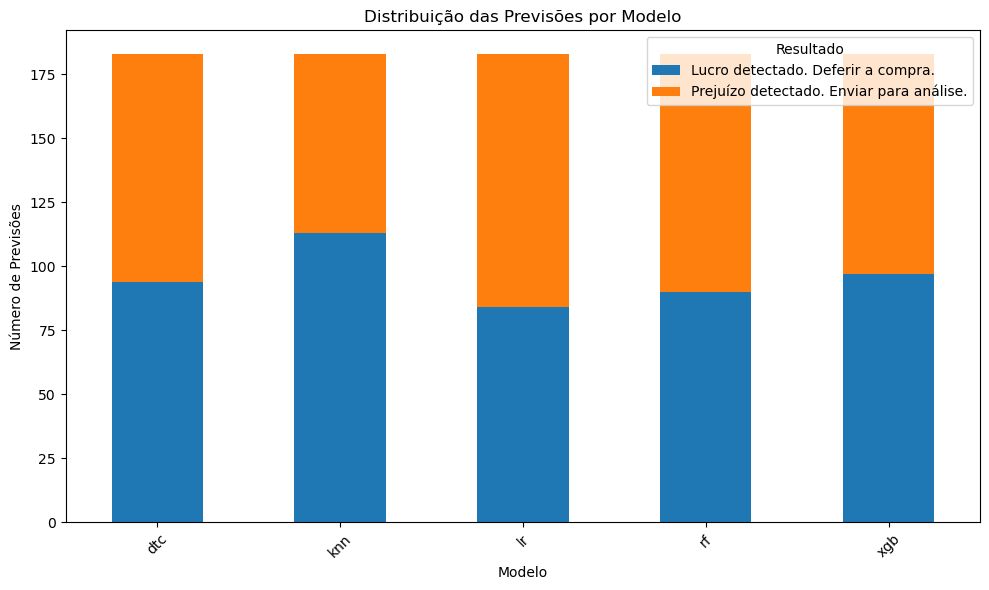

In [69]:
# Contagem de previsões por modelo
count_predictions = results_df.groupby(['Modelo', 'Resultado']).size().unstack(fill_value=0)

# Criar o gráfico de barras
count_predictions.plot(kind='bar', stacked=True, figsize=(10, 6))

# Configurações do gráfico
plt.title('Distribuição das Previsões por Modelo')
plt.xlabel('Modelo')
plt.ylabel('Número de Previsões')
plt.xticks(rotation=45)
plt.legend(title='Resultado')

# Exibir o gráfico
plt.tight_layout()
plt.show()

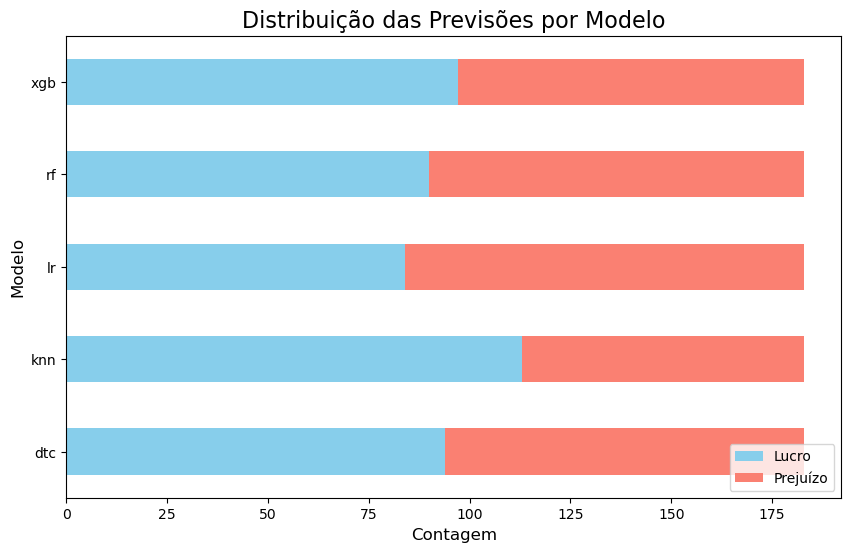

In [74]:
# Contagem de previsões por modelo
count_predictions = results_df.groupby(['Modelo', 'Resultado']).size().unstack(fill_value=0)

# Criar o gráfico de barras horizontal
fig, ax = plt.subplots(figsize=(10, 6))
count_predictions.plot(kind='barh', stacked=True, ax=ax, color=['skyblue', 'salmon'])

# Adicionar título e rótulos dos eixos
ax.set_title('Distribuição das Previsões por Modelo', fontsize=16)
ax.set_xlabel('Contagem', fontsize=12)
ax.set_ylabel('Modelo', fontsize=12)

# Adicionar legenda
ax.legend(['Lucro', 'Prejuízo'], loc='lower right')

# Exibir o gráfico
plt.show()

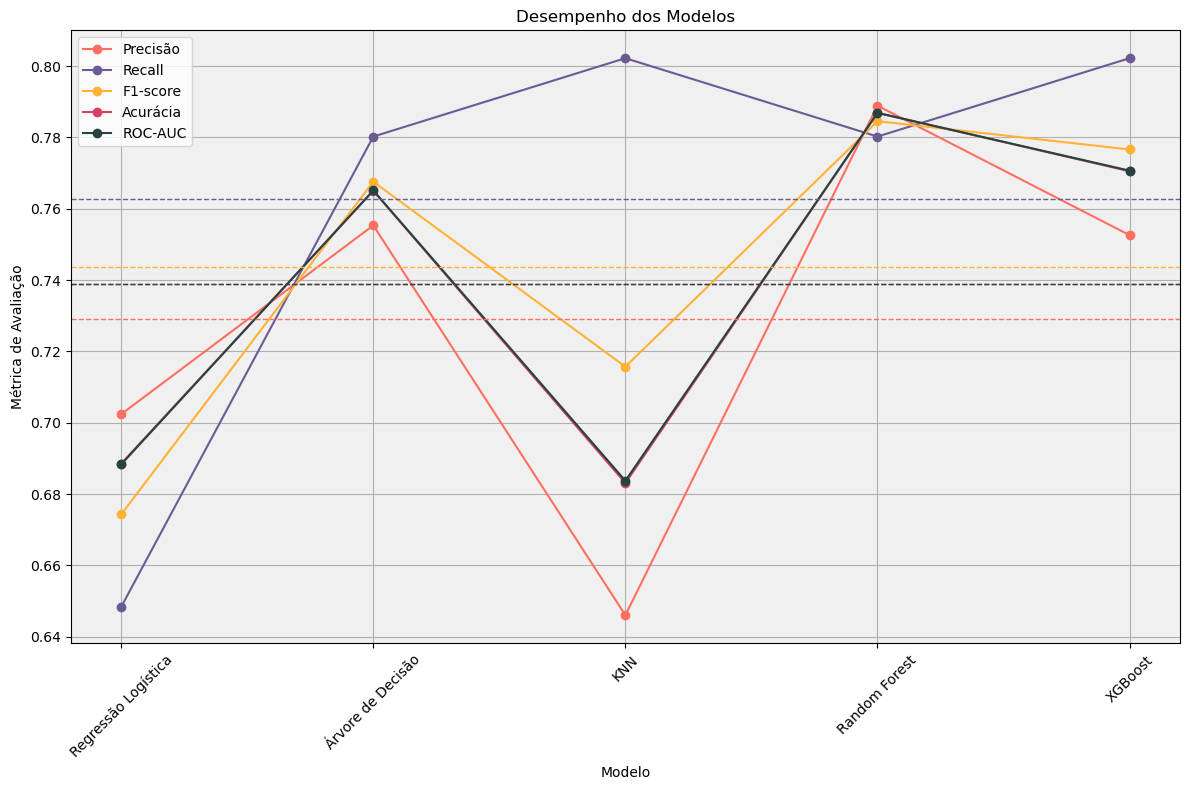

In [91]:
import matplotlib.pyplot as plt

# métricas de avaliação para cada modelo
models = ['Regressão Logística', 'Árvore de Decisão', 'KNN', 'Random Forest', 'XGBoost']
precisions = [precision_lr, precision_dtc, precision_knn, precision_rf, precision_xgb]
recalls = [recall_lr, recall_dtc, recall_knn, recall_rf, recall_xgb]
f1_scores = [f1_lr, f1_dtc, f1_knn, f1_rf, f1_xgb]
accuracies = [accuracy_lr, accuracy_dtc, accuracy_knn, accuracy_rf, accuracy_xgb]
roc_aucs = [roc_auc_lr, roc_auc_dtc, roc_auc_knn, roc_auc_rf, roc_auc_xgb]

colors = ['#ff6f61', '#6b5b95', '#feb236', '#d64161', '#254441']

# Gráfico comparativo
plt.figure(figsize=(12, 8))

plt.plot(models, precisions, marker='o', color=colors[0], label='Precisão')
plt.plot(models, recalls, marker='o', color=colors[1], label='Recall')
plt.plot(models, f1_scores, marker='o', color=colors[2], label='F1-score')
plt.plot(models, accuracies, marker='o', color=colors[3], label='Acurácia')
plt.plot(models, roc_aucs, marker='o', color=colors[4], label='ROC-AUC')

plt.title('Desempenho dos Modelos')
plt.xlabel('Modelo')
plt.ylabel('Métrica de Avaliação')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.gca().set_facecolor('#f0f0f0')

# Adicionando grade ao fundo
plt.gca().set_axisbelow(True)

# A linha horizontal é para destacar a média de cada métrica
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1_score = sum(f1_scores) / len(f1_scores)
mean_accuracy = sum(accuracies) / len(accuracies)
mean_roc_auc = sum(roc_aucs) / len(roc_aucs)

plt.axhline(y=mean_precision, linestyle='--', color=colors[0], linewidth=1)
plt.axhline(y=mean_recall, linestyle='--', color=colors[1], linewidth=1)
plt.axhline(y=mean_f1_score, linestyle='--', color=colors[2], linewidth=1)
plt.axhline(y=mean_accuracy, linestyle='--', color=colors[3], linewidth=1)
plt.axhline(y=mean_roc_auc, linestyle='--', color=colors[4], linewidth=1)

plt.show()